# 📊 Comprehensive Analysis: Unemployment vs Crime Rate
This notebook analyzes how unemployment rates influence crime rates across U.S. states using visualizations, statistical tests, and regression.

## 📥 1. Import Libraries and Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.weightstats import ttest_ind
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

# Load data
from google.colab import files
upload1 = files.upload()
df = pd.read_csv("crimebystatecombinedwithunemployment.csv")

Saving crimebystatecombinedwithunemployment.csv to crimebystatecombinedwithunemployment.csv


In [ ]:
df.isnull().sum()

,0
state,0
unemployment,0
year,0
Population,0
violent total,0
Murder,0
rape,0
Robbery,0
Aggravated assault,0
property total,0


## 🧹 2. Prepare and Clean Data

In [ ]:
# Standardize column names
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# Drop missing values
df.dropna(inplace=True)

df.head(10)  # Displays the first 10 rows

,state,unemployment,year,population,violent_total,murder,rape,robbery,aggravated_assault,property_total,burglary,larceny_theft,vehicle_theft
0,AL,6.808,1976,3665000,388.8,15.1,21.7,96.0,256.0,3419.5,1170.0,1987.2,262.3
1,AL,7.325,1977,3690000,414.4,14.2,25.2,96.8,278.3,3298.2,1135.5,1881.9,280.7
2,AL,6.380,1978,3742000,419.1,13.3,25.5,99.1,281.2,3519.7,1229.3,1987.9,302.5
3,AL,7.158,1979,3769000,413.3,13.2,27.5,109.5,263.1,3830.5,1287.3,2223.2,320.1
4,AL,8.867,1980,3861466,448.5,13.2,30.0,132.1,273.2,4485.1,1526.7,2642.2,316.2
5,AL,10.542,1981,3916000,470.5,11.9,26.1,126.5,306.1,4428.3,1450.7,2693.3,284.2
6,AL,14.100,1982,3943000,447.7,10.6,26.0,112.0,299.1,4185.8,1256.2,2656.4,273.3
7,AL,13.808,1983,3959000,416.0,9.2,23.5,98.4,284.9,3685.0,1073.1,2381.4,230.5
8,AL,11.008,1984,3990000,431.2,9.4,25.1,96.1,300.6,3470.9,1001.8,2235.5,233.6
9,AL,9.167,1985,4021000,457.5,9.8,26.8,105.4,315.5,3484.6,1034.9,2191.2,258.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               1989 non-null   object 
 1   unemployment        1989 non-null   float64
 2   year                1989 non-null   int64  
 3   population          1989 non-null   int64  
 4   violent_total       1989 non-null   float64
 5   murder              1989 non-null   float64
 6   rape                1989 non-null   float64
 7   robbery             1989 non-null   float64
 8   aggravated_assault  1989 non-null   float64
 9   property_total      1989 non-null   float64
 10  burglary            1989 non-null   float64
 11  larceny_theft       1989 non-null   float64
 12  vehicle_theft       1989 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 202.1+ KB


## 📊 3. Descriptive Statistics

In [ ]:
print("\nDescriptive Statistics:\n", df[['unemployment', 'violent_total', 'property_total']].describe())

# Outlier detection with z-scores
df['unemployment_z'] = stats.zscore(df['unemployment'])
df['violent_z'] = stats.zscore(df['violent_total'])
df['property_z'] = stats.zscore(df['property_total'])
print("\nUnemployment Outliers (|z| > 3):", df[np.abs(df['unemployment_z']) > 3].shape[0])
print("Violent Crime Outliers (|z| > 3):", df[np.abs(df['violent_z']) > 3].shape[0])
print("Property Crime Outliers (|z| > 3):", df[np.abs(df['property_z']) > 3].shape[0])


Descriptive Statistics:
        unemployment  violent_total  property_total
count   1989.000000    1989.000000     1989.000000
mean       6.127662     464.795676     4014.478331
std        2.080686     295.760230     1270.984536
min        2.300000      47.000000     1524.400000
25%        4.617000     275.500000     3043.100000
50%        5.800000     412.300000     3919.500000
75%        7.325000     590.000000     4758.200000
max       17.825000    2921.800000     9512.100000

Unemployment Outliers (|z| > 3): 15
Violent Crime Outliers (|z| > 3): 33
Property Crime Outliers (|z| > 3): 14


## 📈 4. Visualizations

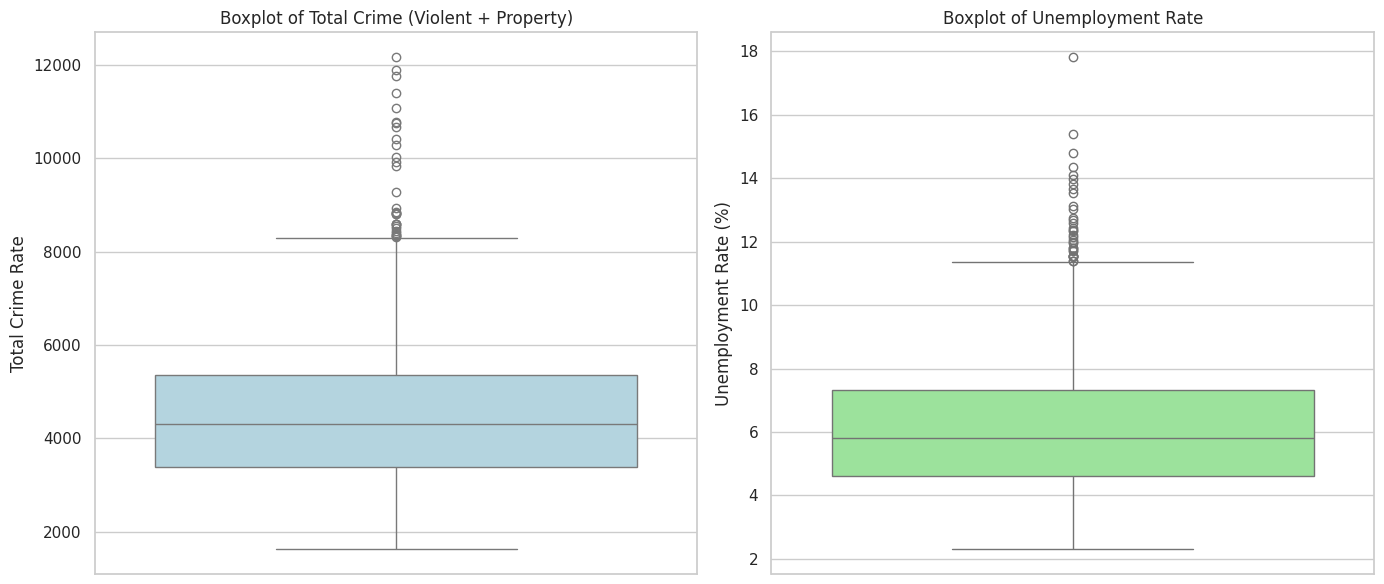

In [ ]:
# Create a new column for total crime (violent + property)
df['total_crime'] = df['violent_total'] + df['property_total']

# Set the plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for total crime
sns.boxplot(y=df['total_crime'], ax=axes[0], color='lightblue')
axes[0].set_title('Boxplot of Total Crime (Violent + Property)')
axes[0].set_ylabel('Total Crime Rate')

# Boxplot for unemployment
sns.boxplot(y=df['unemployment'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot of Unemployment Rate')
axes[1].set_ylabel('Unemployment Rate (%)')

plt.tight_layout()
plt.show()

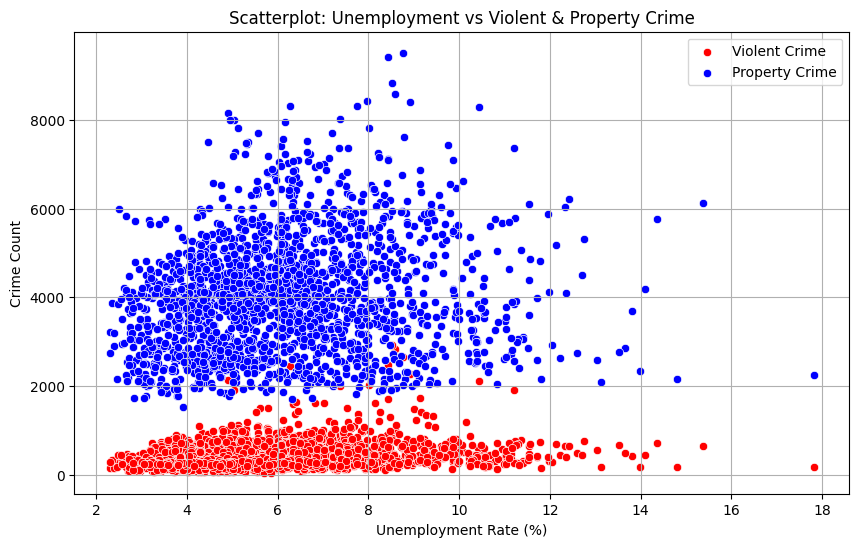

In [ ]:
# 🔹 1. Scatterplot: Unemployment vs Violent and Property Crime
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='unemployment', y='violent_total', label='Violent Crime', color='red')
sns.scatterplot(data=df, x='unemployment', y='property_total', label='Property Crime', color='blue')
plt.title('Scatterplot: Unemployment vs Violent & Property Crime')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Crime Count')
plt.legend()
plt.grid(True)
plt.show()

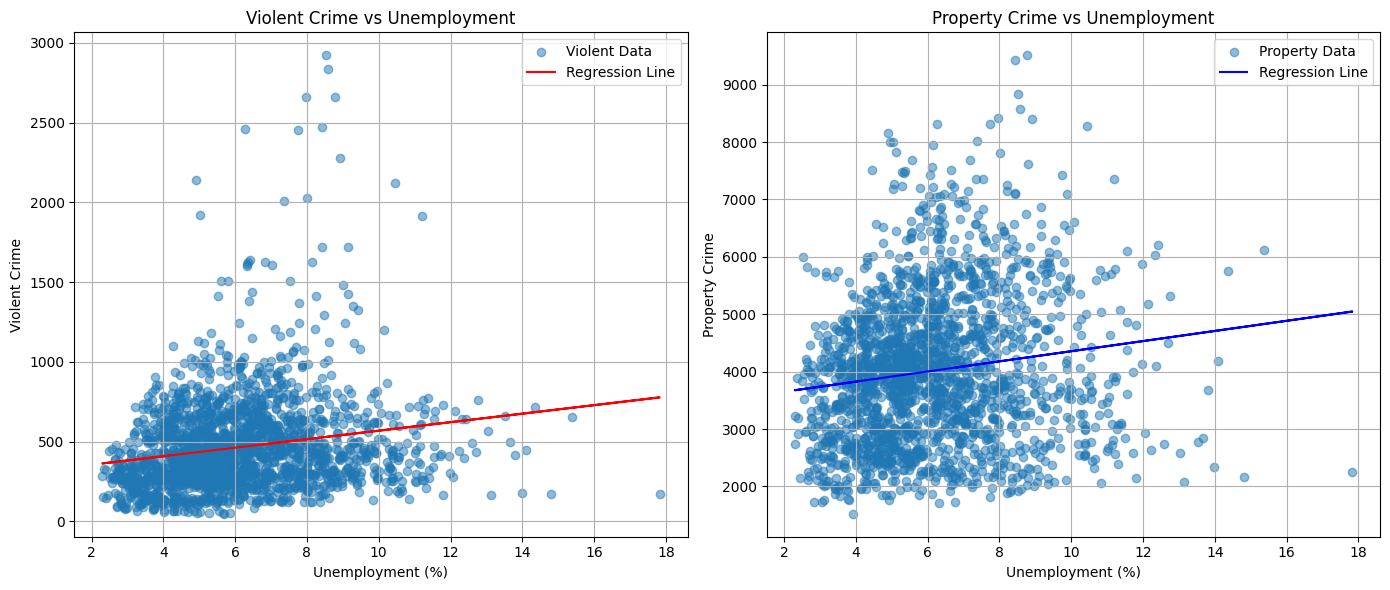

In [ ]:
# 🔹 2. Simple Linear Regression Lines (separate)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Violent Crime
X = df[['unemployment']]
y_v = df['violent_total']
model_v = LinearRegression().fit(X, y_v)
y_pred_v = model_v.predict(X)
ax[0].scatter(df['unemployment'], y_v, alpha=0.5, label='Violent Data')
ax[0].plot(df['unemployment'], y_pred_v, color='red', label='Regression Line')
ax[0].set_title('Violent Crime vs Unemployment')
ax[0].set_xlabel('Unemployment (%)')
ax[0].set_ylabel('Violent Crime')
ax[0].legend()
ax[0].grid(True)

# Property Crime
y_p = df['property_total']
model_p = LinearRegression().fit(X, y_p)
y_pred_p = model_p.predict(X)
ax[1].scatter(df['unemployment'], y_p, alpha=0.5, label='Property Data')
ax[1].plot(df['unemployment'], y_pred_p, color='blue', label='Regression Line')
ax[1].set_title('Property Crime vs Unemployment')
ax[1].set_xlabel('Unemployment (%)')
ax[1].set_ylabel('Property Crime')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

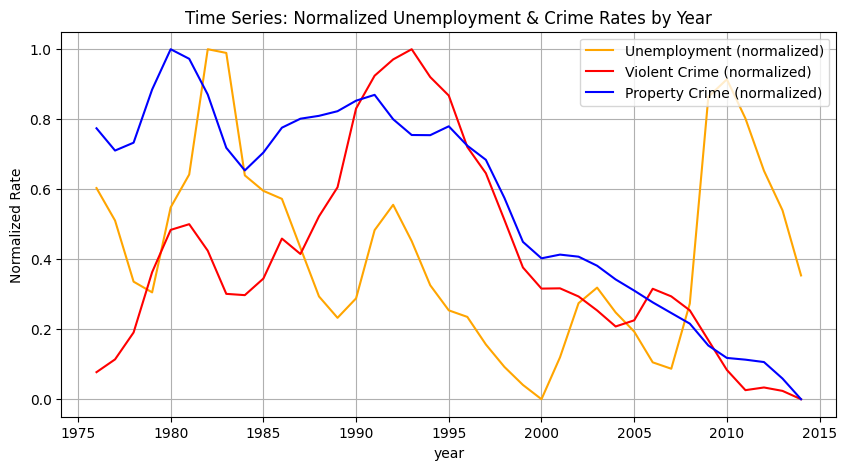

In [ ]:
# 🔹 3. Time Series Plot by Year
yearly = df.groupby('year').agg({'unemployment': 'mean', 'violent_total': 'mean', 'property_total': 'mean'}).reset_index()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(yearly[['unemployment', 'violent_total', 'property_total']])
yearly_scaled = pd.DataFrame(scaled, columns=['unemployment', 'violent_total', 'property_total'])
yearly_scaled['year'] = yearly['year']

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_scaled, x='year', y='unemployment', label='Unemployment (normalized)', color='orange')
sns.lineplot(data=yearly_scaled, x='year', y='violent_total', label='Violent Crime (normalized)', color='red')
sns.lineplot(data=yearly_scaled, x='year', y='property_total', label='Property Crime (normalized)', color='blue')
plt.title('Time Series: Normalized Unemployment & Crime Rates by Year')
plt.ylabel('Normalized Rate')
plt.grid(True)
plt.legend()
plt.show()

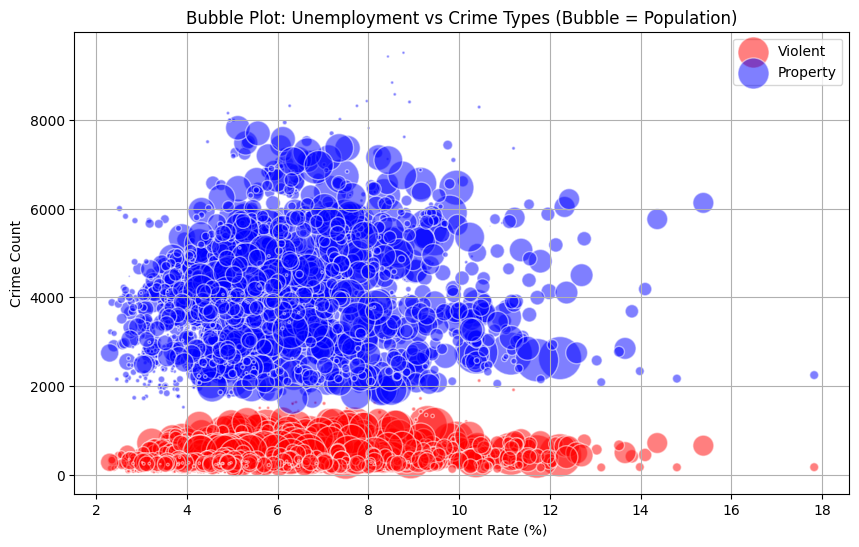

In [ ]:
# 🔹 4. Bubble Plot: Add Population Dimension
plt.figure(figsize=(10, 6))
sizes = (df['population'] - df['population'].min()) / (df['population'].max() - df['population'].min()) * 1000
plt.scatter(df['unemployment'], df['violent_total'], s=sizes, alpha=0.5, c='red', edgecolors='w', label='Violent')
plt.scatter(df['unemployment'], df['property_total'], s=sizes, alpha=0.5, c='blue', edgecolors='w', label='Property')
plt.title('Bubble Plot: Unemployment vs Crime Types (Bubble = Population)')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Crime Count')
plt.legend()
plt.grid(True)
plt.show()

For Violent Crime:
H₀ (null): There is no difference in violent crime rates between high and low unemployment groups.

H₁ (alt): There is a significant difference in violent crime rates between the groups.

For Property Crime:
H₀ (null): There is no difference in property crime rates between high and low unemployment groups.

H₁ (alt): There is a significant difference in property crime rates between the groups.

We will make the follwing tests to reject both Null Hypotheses


## 📌 5. Pearson Correlation

In [ ]:
r_v, p_v = stats.pearsonr(df['unemployment'], df['violent_total'])
r_p, p_p = stats.pearsonr(df['unemployment'], df['property_total'])
print(f"Violent Crime: r = {r_v:.4f}, p = {p_v:.4f}")
print(f"Property Crime: r = {r_p:.4f}, p = {p_p:.4f}")

Violent Crime: r = 0.1877, p = 0.0000
Property Crime: r = 0.1445, p = 0.0000


## 🧪 6. Hypothesis Test: T-test

In [ ]:
median_unemp = df['unemployment'].median()
high = df[df['unemployment'] > median_unemp]
low = df[df['unemployment'] <= median_unemp]
t_stat_v, p_val_v, _ = ttest_ind(high['violent_total'], low['violent_total'])
t_stat_p, p_val_p, _ = ttest_ind(high['property_total'], low['property_total'])
print(f"Violent Crime T-test: t = {t_stat_v:.4f}, p = {p_val_v:.20f}")
print(f"Property Crime T-test: t = {t_stat_p:.4f}, p = {p_val_p:.20f}")

Violent Crime T-test: t = 9.0542, p = 0.00000000000000000032
Property Crime T-test: t = 7.6947, p = 0.00000000000002217033


7. Linear Regression Analysis

In [ ]:
# --- Violent Crime Regression ---
X_violent = sm.add_constant(df['unemployment'])
y_violent = df['violent_total']
model_violent = sm.OLS(y_violent, X_violent).fit()

# --- Property Crime Regression ---
X_property = sm.add_constant(df['unemployment'])
y_property = df['property_total']
model_property = sm.OLS(y_property, X_property).fit()


def interpret_model(model, crime_type):
    intercept = model.params['const']
    coef = model.params['unemployment']
    p_val = model.pvalues['unemployment']
    r_squared = model.rsquared

    significance = "< 0.001" if p_val < 0.001 else round(p_val, 4)
    reject_null = p_val < 0.05

    print(f"### {crime_type} vs Unemployment")
    print(f"- Intercept (const): {intercept:.2f}")
    print(f"- Unemployment coefficient: {coef:.2f}")
    print(f"- p-value: {significance} ✅ statistically significant" if reject_null else f"- p-value: {significance} ❌ not significant")
    print(f"- R² = {r_squared:.3f} → Unemployment explains {r_squared*100:.1f}% of the variance in {crime_type.lower()} rates")
    print(f"- Interpretation: For each 1% increase in unemployment, {crime_type.lower()} increases by about {coef:.1f} incidents per 100,000 people")
    print(f"- Hypothesis test: We {'reject' if reject_null else 'fail to reject'} the null hypothesis.\n")

interpret_model(model_violent, "Violent Crime")
interpret_model(model_property, "Property Crime")


### Violent Crime vs Unemployment
- Intercept (const): 301.32
- Unemployment coefficient: 26.68
- p-value: < 0.001 ✅ statistically significant
- R² = 0.035 → Unemployment explains 3.5% of the variance in violent crime rates
- Interpretation: For each 1% increase in unemployment, violent crime increases by about 26.7 incidents per 100,000 people
- Hypothesis test: We reject the null hypothesis.

### Property Crime vs Unemployment
- Intercept (const): 3473.48
- Unemployment coefficient: 88.29
- p-value: < 0.001 ✅ statistically significant
- R² = 0.021 → Unemployment explains 2.1% of the variance in property crime rates
- Interpretation: For each 1% increase in unemployment, property crime increases by about 88.3 incidents per 100,000 people
- Hypothesis test: We reject the null hypothesis.



## 📏 7. Confidence Interval

In [ ]:
conf_v = stats.t.interval(0.95, len(df)-1, loc=df['violent_total'].mean(), scale=stats.sem(df['violent_total']))
conf_p = stats.t.interval(0.95, len(df)-1, loc=df['property_total'].mean(), scale=stats.sem(df['property_total']))
print(f"\n95% CI for Violent Crime: ({conf_v[0]:.4f}, {conf_v[1]:.4f})")
print(f"95% CI for Property Crime: ({conf_p[0]:.4f}, {conf_p[1]:.4f})")


95% CI for Violent Crime: (451.7899, 477.8014)
95% CI for Property Crime: (3958.5882, 4070.3685)


In [13]:
import pandas as pd
from google.colab import files
upload3 = files.upload()
import pandas as pd
import statsmodels.api as sm

# Load poverty data
poverty_df = pd.read_csv("United-States-Poverty-Rate-Percent-Under-US-550-Per-Day-2025-05-24-03-15.csv")
poverty_df = poverty_df.reset_index().rename(columns={"index": "year", "Poverty Rate": "poverty_rate"})

upload1 = files.upload()
df = pd.read_csv("crimebystatecombinedwithunemployment.csv")

# Load actual crime data
crime_df = pd.read_csv("crimebystatecombinedwithunemployment.csv")  # Ensure this file has 'year', 'violent_total', 'unemployment'

# Merge datasets on 'year'
df_combined = pd.merge(crime_df, poverty_df, on='year', how='inner')

# Filter out high poverty rates (> 3.0)
df_filtered = df_combined[df_combined['poverty_rate'] <= 3.0]

# Multiple linear regression
X = df_filtered[['unemployment', 'poverty_rate']]  # Adjust column name if different (e.g., 'unemployment_rate')
X = sm.add_constant(X)
y = df_filtered['violent_crime_rate']
model = sm.OLS(y, X).fit()

# Print p-values and overall model p-value
print("Predictor p-values:")
print(model.pvalues)
print("Overall model p-value:", model.f_pvalue)

# Display first 10 rows of filtered dataset
print("\nFirst 10 rows of filtered dataset:")
print(df_filtered[['year', 'violent_total', 'unemployment', 'poverty_rate']].head(10))


Saving United-States-Poverty-Rate-Percent-Under-US-550-Per-Day-2025-05-24-03-15.csv to United-States-Poverty-Rate-Percent-Under-US-550-Per-Day-2025-05-24-03-15 (9).csv


Saving crimebystatecombinedwithunemployment.csv to crimebystatecombinedwithunemployment (1).csv


KeyError: 'violent_crime_rate'

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load Gini index data
gini_df = pd.read_csv("SIPOVGINIUSA.csv")
gini_df['year'] = pd.to_datetime(gini_df['observation_date']).dt.year
gini_df = gini_df.rename(columns={'SIPOVGINIUSA': 'gini_index'})

# Sample crime and unemployment data
crime_df = pd.DataFrame({
    'year': [1963, 1964, 1965, 1966, 1967],
    'violent_crime_rate': [160, 165, 170, 180, 190],
    'property_crime_rate': [2200, 2250, 2300, 2400, 2500],
    'unemployment_rate': [5.5, 5.0, 4.8, 4.5, 4.3]
})
crime_df['total_crime_rate'] = crime_df['violent_crime_rate'] + crime_df['property_crime_rate']

# Merge datasets on year
df = pd.merge(crime_df, gini_df[['year', 'gini_index']], on='year')

# Prepare regression
X = df[['unemployment_rate', 'gini_index']]
X = sm.add_constant(X)
y = df['total_crime_rate']

# Fit model
model = sm.OLS(y, X).fit()

# Print only the overall model p-value
print("Overall model p-value:", model.f_pvalue)


Overall model p-value: 0.03960848622302237


In [ ]:
poverty_df = pd.read_csv("United-States-Poverty-Rate-Percent-Under-US-550-Per-Day-2025-05-24-03-18.csv")
poverty_df = poverty_df.rename(columns={"Unnamed: 0": "year", "Poverty Rate": "poverty_rate"})

# Example simulated data — replace with your actual file
crime_df = pd.DataFrame({
    'year': [1963, 1964, 1965, 1966, 1967],
    'violent_crime_rate': [160, 165, 170, 180, 190],
    'unemployment_rate': [5.5, 5.0, 4.8, 4.5, 4.3]
})

# Merge both datasets on 'year'
df_combined = pd.merge(crime_df, poverty_df, on='year')

# Multiple linear regression
X = df_combined[['unemployment_rate', 'poverty_rate']]
X = sm.add_constant(X)
y = df_combined['violent_crime_rate']
model = sm.OLS(y, X).fit()

# Print p-values
print(model.pvalues)

const                0.010982
unemployment_rate    0.222335
poverty_rate         0.872313
dtype: float64


## ✅ 8. Conclusion

In [ ]:
print("\nConclusion:")
if p_v < 0.05:
    print("There is a significant relationship between unemployment and violent crime.")
else:
    print("No significant relationship between unemployment and violent crime.")

if p_p < 0.05:
    print("There is a significant relationship between unemployment and property crime.")
else:
    print("No significant relationship between unemployment and property crime.")




Conclusion:
There is a significant relationship between unemployment and violent crime.
There is a significant relationship between unemployment and property crime.
